In [ ]:
!pip install -q kaggle

In [1]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d omkargurav/face-mask-dataset

Saving kaggle.json to kaggle.json
100% 163M/163M [00:06<00:00, 31.2MB/s]
100% 163M/163M [00:06<00:00, 27.4MB/s]


In [2]:
# extracting data from the zip file
from zipfile import ZipFile
data = '/content/face-mask-dataset.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()

# 1. Import Dependencies and Understanding Data

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image
# cv2.imshow() and cv.imshow() are incompatible with google colab hence we need to import the following
from google.colab.patches import cv2_imshow

In [4]:
# displaying image names from each folder
print("With Mask FOlder:")
with_mask = os.listdir('/content/data/with_mask')
print(with_mask[:5])
print(with_mask[-5:])

print('\n')

print("Without Mask FOlder:")
without_mask = os.listdir('/content/data/without_mask')
print(without_mask[:5])
print(without_mask[-5:])

With Mask FOlder:
['with_mask_2522.jpg', 'with_mask_334.jpg', 'with_mask_1027.jpg', 'with_mask_3434.jpg', 'with_mask_2941.jpg']
['with_mask_2407.jpg', 'with_mask_809.jpg', 'with_mask_2958.jpg', 'with_mask_1004.jpg', 'with_mask_3394.jpg']


Without Mask FOlder:
['without_mask_375.jpg', 'without_mask_1498.jpg', 'without_mask_1626.jpg', 'without_mask_2480.jpg', 'without_mask_560.jpg']
['without_mask_1166.jpg', 'without_mask_3294.jpg', 'without_mask_76.jpg', 'without_mask_591.jpg', 'without_mask_1951.jpg']


In [5]:
print("Number of Images in the With Mask Folder: ", len(with_mask))
print("Number of Images in the Without Mask Folder: ", len(without_mask))

Number of Images in the With Mask Folder:  3725
Number of Images in the Without Mask Folder:  3828


With Mask: 


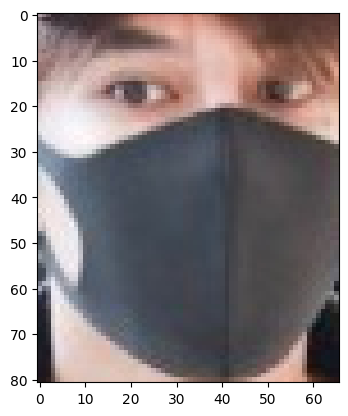



Without Mask: 


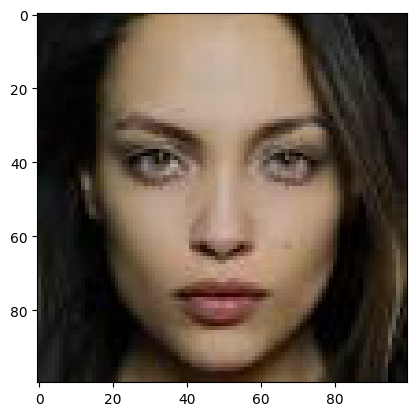

In [6]:
# display images
print("With Mask: ")
img = mpimg.imread('/content/data/with_mask/with_mask_119.jpg')
imgplot = plt.imshow(img)
plt.show()
print("\n")
print("Without Mask: ")
img = mpimg.imread('/content/data/without_mask/without_mask_1107.jpg')
imgplot = plt.imshow(img)
plt.show()

# 2. Image Processing

In [7]:
# label encoding (with mask - 1         without mask - 0)
# resizing images to same size
# convert the images into a np array

data = []
label = []

without_mask = os.listdir('/content/data/without_mask')
for i in without_mask:
  image_path = '/content/data/without_mask/' + i
  image = Image.open(image_path)
  image = image.convert("RGBA")
  image = image.resize((128, 128)) #resize
  image = image.convert("RGB")
  image = np.array(image) #converting to numpy array
  data.append(image)
  label.append(0) #label encoding

with_mask = os.listdir('/content/data/with_mask')
for i in with_mask:
  image_path = '/content/data/with_mask/' + i
  image = Image.open(image_path)
  image = image.convert("RGBA")
  image = image.resize((128, 128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)
  label.append(1)

In [8]:
data[0].shape

(128, 128, 3)

In [9]:
x = np.array(data)
y = np.array(label)

print(x.shape, y.shape)

(7553, 128, 128, 3) (7553,)


# 3. Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [11]:
print(y.shape, y_train.shape, y_test.shape)

(7553,) (6042,) (1511,)


# 4. CNN

In [32]:
import tensorflow as tf
from tensorflow import keras

classes = 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(32, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(classes, activation = 'sigmoid')) #sigmoid used for binary classification

In [33]:
#compile CNN
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [42]:
# training the neural network

nn_training = model.fit(x_train_scaled, y_train, validation_split = 0.1, epochs = 15)

Epoch 1/15
170/170 [==============================] - 194s 1s/step - loss: 0.1909 - acc: 0.9340 - val_loss: 0.1745 - val_acc: 0.9455
Epoch 2/15
170/170 [==============================] - 196s 1s/step - loss: 0.1682 - acc: 0.9452 - val_loss: 0.1676 - val_acc: 0.9455
Epoch 3/15
170/170 [==============================] - 199s 1s/step - loss: 0.1659 - acc: 0.9461 - val_loss: 0.1538 - val_acc: 0.9405
Epoch 4/15
170/170 [==============================] - 197s 1s/step - loss: 0.1283 - acc: 0.9582 - val_loss: 0.1761 - val_acc: 0.9471
Epoch 5/15
170/170 [==============================] - 203s 1s/step - loss: 0.1147 - acc: 0.9617 - val_loss: 0.1560 - val_acc: 0.9504
Epoch 6/15
170/170 [==============================] - 197s 1s/step - loss: 0.1025 - acc: 0.9625 - val_loss: 0.1760 - val_acc: 0.9488
Epoch 7/15
170/170 [==============================] - 190s 1s/step - loss: 0.1021 - acc: 0.9678 - val_loss: 0.1782 - val_acc: 0.9570
Epoch 8/15
170/170 [==============================] - 196s 1s/step - 

# 5. Evaluation

In [43]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(loss, accuracy)

48/48 [==============================] - 13s 278ms/step - loss: 0.1974 - acc: 0.9610
0.1973729133605957 0.9609529972076416


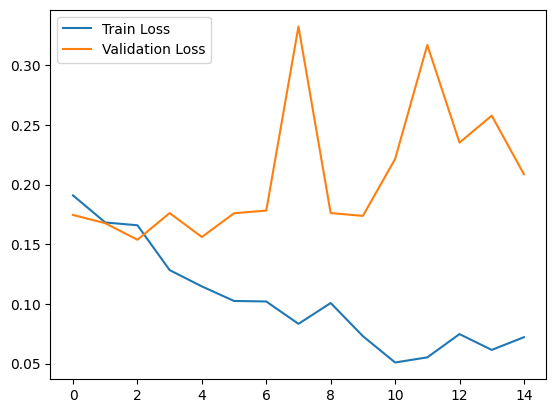

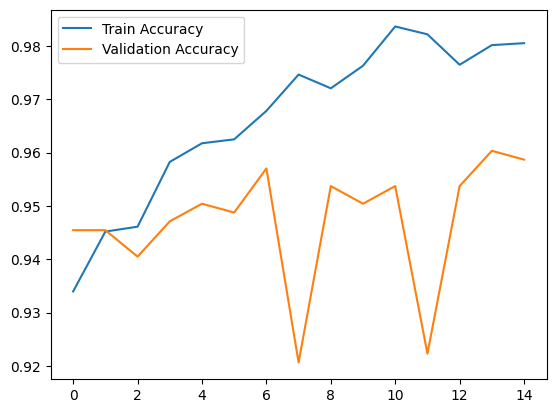

In [44]:
h = nn_training

# plotting the loss value
plt.plot(h.history['loss'], label='Train Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# plotting the accuracy value
plt.plot(h.history['acc'], label='Train Accuracy')
plt.plot(h.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

# 6. Predictions

In [45]:
predictions = model.predict(x_test_scaled)

predict=[]

for i in range(len(predictions)):
    if predictions[i][0]>0.5:
        predict.append(1)
    else:
        predict.append(0)

48/48 [==============================] - 13s 276ms/step


In [50]:
def predictions(image_path_pred):
  input_img = cv2.imread(image_path_pred)
  cv2_imshow(input_img)

  input_img = cv2.resize(input_img, (128, 128))
  input_img_scaled = input_img/255
  input_img = np.reshape(input_img_scaled, [1, 128, 128, 3])

  inp_pred = model.predict(input_img)

  inp_label = np.argmax(inp_pred)

  if inp_label == 0:
    print("No Mask Detected! Please wear your Mask!!")
  else:
    print("Thank You for Wearing your Mask!!")

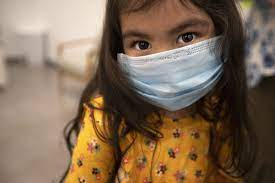

1/1 [==============================] - 0s 56ms/step
Thank You for Wearing your Mask!!


In [51]:
predictions('/content/mask.jpeg')

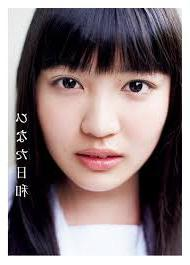

1/1 [==============================] - 0s 51ms/step
No Mask Detected! Please wear your Mask!!


In [52]:
predictions('/content/no mask.jpg')